<a href="https://colab.research.google.com/github/kurrnia/Dicoding/blob/main/Dicoding%20Pengembangan%20Machine%20Learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membuat dan Melatih Model Neural Network dengan Tensorflow dan Keras

## Menggunakan Model untuk Melakukan Prediksi

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1]), keras.layers.Dense(units=8), keras.layers.Dense(units=1)])

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 327ms/step - loss: 120.2007
Epoch 2/150
1/1 [==============================] - 0s 8ms/step - loss: 3.3187
Epoch 3/150
1/1 [==============================] - 0s 7ms/step - loss: 10.3262
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 42.1519
Epoch 5/150
1/1 [==============================] - 0s 7ms/step - loss: 1.1450
Epoch 6/150
1/1 [==============================] - 0s 6ms/step - loss: 3.6978
Epoch 7/150
1/1 [==============================] - 0s 6ms/step - loss: 9.6565
Epoch 8/150
1/1 [==============================] - 0s 6ms/step - loss: 36.7771
Epoch 9/150
1/1 [==============================] - 0s 7ms/step - loss: 1.1608
Epoch 10/150
1/1 [==============================] - 0s 6ms/step - loss: 3.9118
Epoch 11/150
1/1 [==============================] - 0s 6ms/step - loss: 9.1869
Epoch 12/150
1/1 [==============================] - 0s 10ms/step - loss: 33.7679
Epoch 13/150
1/1 [==============================] - 

In [ ]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 65ms/step
[[24.896038]]


## Membuat Model untuk Klasifikasi Dua Kelas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/citrus.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df.name[df.name == 'orange'] = 0
df.name[df.name == 'grapefruit'] = 1

<ipython-input-21-e9c3e7476411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'orange'] = 0
<ipython-input-21-e9c3e7476411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'grapefruit'] = 1


In [ ]:
dataset = df.values

In [ ]:
X = dataset[:,1:6]

In [ ]:
y = dataset[:,0]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
import numpy as np

Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([    
                    Dense(32, activation='relu', input_shape=(5,)),    
                    Dense(32, activation='relu'),    
                    Dense(1, activation='sigmoid'),])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.6629 - accuracy: 0.7746
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.9087
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.9177
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.9239
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.9247
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9239
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9249
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9257
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9246
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9259

In [ ]:
model.evaluate(X_test, Y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9320


[0.18411985039710999, 0.9319999814033508]

## Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas

In [ ]:
# import library yang akan digunakan
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# berfungsi untuk memanggil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = df.drop(columns='Id')

In [ ]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.1139 - accuracy: 0.4095
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0646 - accuracy: 0.5905
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0257 - accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9922 - accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9422 - accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9191 - accuracy: 0.6000
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8960 - accuracy: 0.6000
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8722 - accuracy: 0.6000
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8483 - accuracy: 0.6095
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0628 - accuracy: 0.9778


[0.06279096752405167, 0.9777777791023254]

## Plot Loss dan Akurasi dari Trained Model

In [ ]:
import matplotlib.pyplot as plt

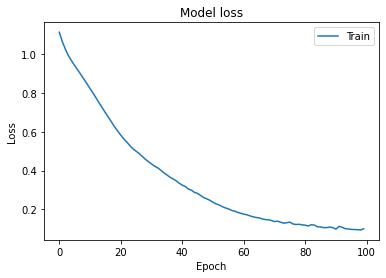

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

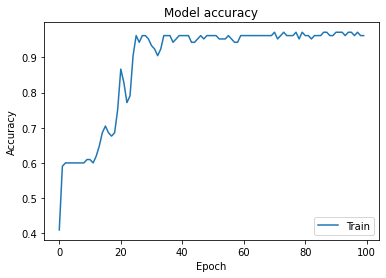

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## Penggunaan Callbacks

In [ ]:
# import library
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# berfungsi untuk memanggil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
X = dataset[:,0:4]
y = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# selanjutnya membuat kelas callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.fit(X_train, Y_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 1.0662 - accuracy: 0.4190
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0254 - accuracy: 0.6571
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9915 - accuracy: 0.6571
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9612 - accuracy: 0.6571
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9303 - accuracy: 0.6571
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8992 - accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8667 - accuracy: 0.6667
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8350 - accuracy: 0.6667
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8013 - accuracy: 0.6667
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7676 - accuracy: 0.6667
Epoch 11/50
4/4 [======================

## Menggunakan Dataset dari tf.data.datasets

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5


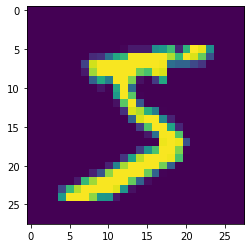

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [ ]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2629 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1147 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0783 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0451 - accuracy: 0.9861


## Penggunaan Batch Loading

In [ ]:
# dataset dan sintak sama seperti modul diatas
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# jika menggunakan batch size 32 (defalult) maka waktu yang dihabiskan berkisar 5-10 detik
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0266 - accuracy: 0.9916
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9932
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9948
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9956


In [ ]:
# jika menggunakan batch size 128 maka waktu proses yang di jalankan menjadi lebih cepat
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - accuracy: 0.9998
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 0.9999


# kualisifikasi gambar

## Membuat dan Melatih Model untuk Memproses Dataset Gambar dari Dunia Nyata

In [ ]:
# melakukan proses unduh data
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-02-14 12:32:03--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-02-14 12:32:03--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   276MB/s    in 

In [ ]:
# proses ekstrak dataset 
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# gunakan direktori os.listdir untuk melihat direktori yang terdapat saat ini
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'King', 'Bishop', 'Pawn', 'Knight', 'Queen']

In [ ]:
# Selanjutnya kita perlu melihat berapa banyak gambar pada setiap direktori
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


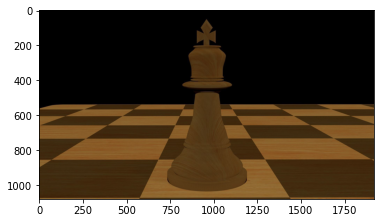

In [ ]:
# Kita dapat melihat contoh dari sebuah gambar pada dataset dengan menjalankan kode di bawah.
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [ ]:
# Selanjutnya kita impor ImageDataGenerator dan aplikasikan augmentasi gambar pada dataset kita
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [ ]:
# dengan image data generator akan membagi data menjadi training dan testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
# Selanjutnya, kita buat arsitektur dari model kita. Untuk model ini kita 
# menggunakan 3 lapis convolution dan 2 hidden layer dengan 512 dan 256 buah unit perseptron.
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [ ]:
# Setelah arsitektur dibuat, tentukan optimizer dan loss yang akan digunakan model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# Terakhir, panggil fungsi fit untuk melatih model kita.
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 34s - loss: 1.8225 - accuracy: 0.1844 - val_loss: 1.7888 - val_accuracy: 0.1731 - 34s/epoch - 540ms/step
Epoch 2/50
63/63 - 32s - loss: 1.8014 - accuracy: 0.1884 - val_loss: 1.7831 - val_accuracy: 0.1923 - 32s/epoch - 505ms/step
Epoch 3/50
63/63 - 32s - loss: 1.7920 - accuracy: 0.1864 - val_loss: 1.7831 - val_accuracy: 0.1923 - 32s/epoch - 511ms/step
Epoch 4/50
63/63 - 33s - loss: 1.7852 - accuracy: 0.1864 - val_loss: 1.7787 - val_accuracy: 0.2308 - 33s/epoch - 519ms/step
Epoch 5/50
63/63 - 31s - loss: 1.7866 - accuracy: 0.2024 - val_loss: 1.7816 - val_accuracy: 0.2308 - 31s/epoch - 489ms/step
Epoch 6/50
63/63 - 32s - loss: 1.7517 - accuracy: 0.2124 - val_loss: 1.7233 - val_accuracy: 0.2885 - 32s/epoch - 502ms/step
Epoch 7/50
63/63 - 31s - loss: 1.7175 - accuracy: 0.2365 - val_loss: 1.6789 - val_accuracy: 0.2500 - 31s/epoch - 485ms/step
Epoch 8/50
63/63 - 32s - loss: 1.6832 - accuracy: 0.2926 - val_loss: 1.7142 - val_accuracy: 0.2308 - 32s/epoch - 510ms/step
Epoch 9/

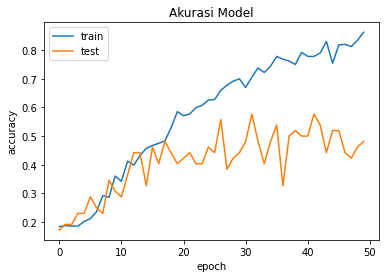

In [ ]:
# membuat plot akurasi dari model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

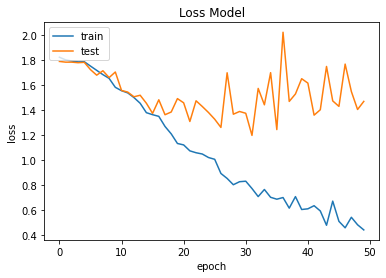

In [ ]:
# membuat plot loss dari model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Transfer Learning

In [ ]:
# modul yang digunakan sama dengan modul yang dipakai sebelumnya
# langkah awal dengan mendownload dataset chessman
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2023-02-16 04:08:30--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-02-16 04:08:31--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   124MB/s   

In [ ]:
# Kemudian, kita buat direktori untuk dataset kita untuk digunakan pada ImageDataGenerator.
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [ ]:
# membagi dataset menjadi training dan testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
# Untuk model yang kita pilih sebagai model dasar transfer learning adalah ResNet152V2
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234545216/234545216 [==============================] - 11s 0us/step


In [ ]:
# Lanjutkan dengan menentukan optimizer, loss, serta metrik yang ingin digunakan pada model.
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# melakukan pelatihan model, kali ini saya melakukan pelatihan sebanyak 10 kali
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=10,
                              verbose=2)

Epoch 1/10
63/63 - 34s - loss: 9.4541 - accuracy: 0.4529 - val_loss: 1.7327 - val_accuracy: 0.6731 - 34s/epoch - 547ms/step
Epoch 2/10
63/63 - 11s - loss: 2.2202 - accuracy: 0.6473 - val_loss: 1.6623 - val_accuracy: 0.6731 - 11s/epoch - 170ms/step
Epoch 3/10
63/63 - 10s - loss: 1.7549 - accuracy: 0.7054 - val_loss: 2.4842 - val_accuracy: 0.6731 - 10s/epoch - 164ms/step
Epoch 4/10
63/63 - 11s - loss: 1.2737 - accuracy: 0.7555 - val_loss: 1.6785 - val_accuracy: 0.6731 - 11s/epoch - 178ms/step
Epoch 5/10
63/63 - 11s - loss: 0.7030 - accuracy: 0.8457 - val_loss: 1.4079 - val_accuracy: 0.7500 - 11s/epoch - 175ms/step
Epoch 6/10
63/63 - 11s - loss: 0.5839 - accuracy: 0.8637 - val_loss: 1.6232 - val_accuracy: 0.6154 - 11s/epoch - 178ms/step
Epoch 7/10
63/63 - 11s - loss: 0.6234 - accuracy: 0.8577 - val_loss: 0.8386 - val_accuracy: 0.7115 - 11s/epoch - 176ms/step
Epoch 8/10
63/63 - 11s - loss: 0.7308 - accuracy: 0.8397 - val_loss: 1.0690 - val_accuracy: 0.7115 - 11s/epoch - 174ms/step
Epoch 9/

## Style Transfer

In [ ]:
# Kode di bawah adalah fungsi untuk mengubah tensor menjadi gambar
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
def image_to_tensor(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3, dtype=tf.float32)
    
    # Resize the image to specific dimensions
    img = tf.image.resize(img, [512, 512])
    img = img[tf.newaxis, :]
    return img

In [ ]:
# blm kelar karena mls cari gambar 

## Latihan Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words= 15, oov_token='-')

In [ ]:
teks = ['Saya suka programming',
        'Programming sangat menyenangkan!',
        'Machine Learning berbeda dengan pemrograman konvensional']

In [ ]:
# Untuk melakukan tokenisasi, panggil fungsi fit_on_text() pada objek tokenizer dan isi teks kita sebagai argumennya.
tokenizer.fit_on_texts(teks)

In [ ]:
# Kemudian, kita akan mengubah text yang telah dibuat sebelumnya ke dalam bentuk sequence menggunakan fungsi text_to_sequences.
sequences = tokenizer.texts_to_sequences(teks)

In [ ]:
print(tokenizer.word_index)

{'-': 1, 'programming': 2, 'saya': 3, 'suka': 4, 'sangat': 5, 'menyenangkan': 6, 'machine': 7, 'learning': 8, 'berbeda': 9, 'dengan': 10, 'pemrograman': 11, 'konvensional': 12}


In [ ]:
# Untuk menggunakan padding, kita perlu memanggil library pad_sequence terlebih dahulu.
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_samapanjang = pad_sequences(sequences)

In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5)

In [ ]:
sequences_samapanjang = pad_sequences(sequences, 
                                      padding='post',
                                      maxlen=5,
                                      truncating='post')

In [ ]:
print(sequences_samapanjang)

[[ 3  4  2  0  0]
 [ 2  5  6  0  0]
 [ 7  8  9 10 11]]


## Latihan Time Series dengan LSTM

In [5]:
# berfungsi untuk memanggil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dicoding py')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
data_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dicoding py/DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [8]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

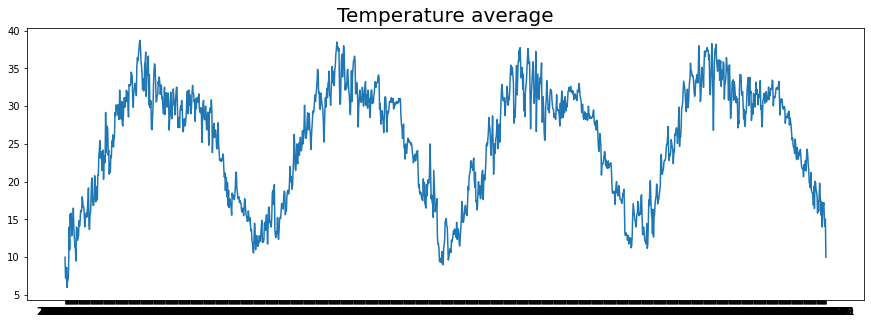

In [9]:
dates = data_train['date'].values
temp  = data_train['meantemp'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [10]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [11]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [12]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 [==============================] - 6s 117ms/step - loss: 23.7887 - mae: 24.2887
Epoch 2/100
15/15 [==============================] - 2s 89ms/step - loss: 7.9107 - mae: 8.3967
Epoch 3/100
15/15 [==============================] - 1s 73ms/step - loss: 5.2107 - mae: 5.6947
Epoch 4/100
15/15 [==============================] - 1s 73ms/step - loss: 5.6213 - mae: 6.1039
Epoch 5/100
15/15 [==============================] - 1s 71ms/step - loss: 6.3345 - mae: 6.8183
Epoch 6/100
15/15 [==============================] - 1s 73ms/step - loss: 4.1853 - mae: 4.6659
Epoch 7/100
15/15 [==============================] - 2s 105ms/step - loss: 4.0007 - mae: 4.4782
Epoch 8/100
15/15 [==============================] - 1s 75ms/step - loss: 4.5170 - mae: 5.0002
Epoch 9/100
15/15 [==============================] - 1s 74ms/step - loss: 3.6517 - mae: 4.1305
Epoch 10/100
15/15 [==============================] - 1s 74ms/step - loss: 5.7018 - mae: 6.1866
Epoch 11/100
15/15 [=========================